<font size=4 color='blue'>Copyright: 2020</font>

<font size=4 color='blue'>Author:    Fernand B. Eloundou</font>

----------------------------------------------------------------------

<font size=4 color='black'>File:     Field_RLD_Control_Plots.ipynb</font>

----------------------------------------------------------------------

Visualize 2D trench data in the control plot from the field experiment at Campus-Klein Altendorf.

The data is measured by counting the frame placed on the section of the soil profile wall perpendicular to the plant rows. The counting frame is represented by a 5 x 5 cm grid cell labeled h in the dataset. The measurements are taking at the shooting and flowering stages.

Data source: Athmann, M., University of Bonn, Institute of Organic Farming, personal communication (2020).

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pickle as pkl

In [2]:
# Read trench data

rld_ctrl = pd.read_excel('RLD_2018.xlsx', sheet_name='RLD_control')    

In [3]:
# RLD during shooting (counting=1)
# RLD during flowering (counting=2)

shooting_ctrl  = (rld_ctrl[rld_ctrl['counting']==1]).fillna(-1) 
flowering_ctrl = (rld_ctrl[rld_ctrl['counting']==2]).fillna(-1)

In [4]:
# 2D contour lines

x1 = np.linspace(-47.5, 47.5, 20)
y1 = np.linspace(-2.5, -97.5, 20)
levels = np.linspace(0,4,21)

# Field repetition 2 during shooting
shooting12 = shooting_ctrl.iloc[:20, 3:]
X12, Y12 = np.meshgrid(x1, y1)

# Field repetition 3 during shooting
shooting13 = shooting_ctrl.iloc[20:, 3:]
X13, Y13 = np.meshgrid(x1, y1)

In [5]:
# Field repetitions during flowering
flowering21 = flowering_ctrl.iloc[:20, 3:]
X21, Y21 = np.meshgrid(x1, y1)

flowering22 = flowering_ctrl.iloc[20:40, 3:]
X22, Y22 = np.meshgrid(x1, y1)

flowering23 = flowering_ctrl.iloc[40:, 3:]
X23, Y23 = np.meshgrid(x1, y1)

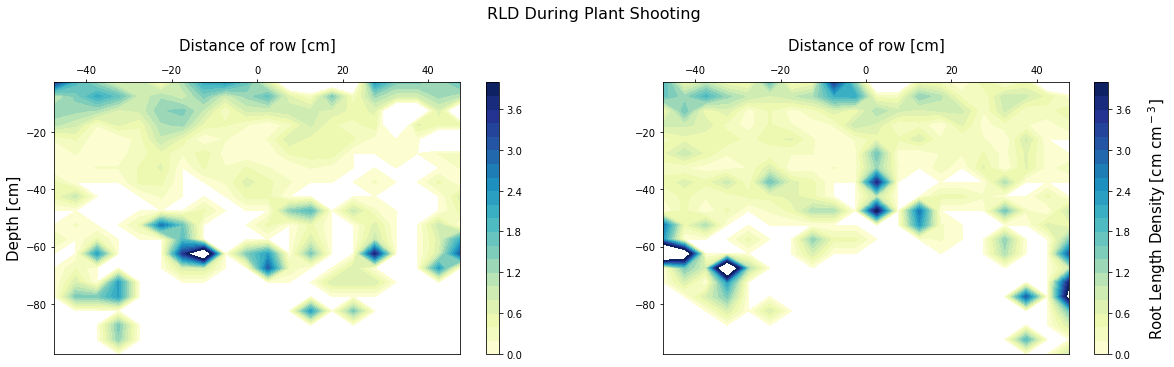

In [6]:
# Plot of RLD during shooting stage

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle("RLD During Plant Shooting", fontsize=16, y=1.09) 

fig12 = ax1.contourf(X12, Y12, shooting12, cmap='YlGnBu',levels=levels)#,levels=levels
ax1.set_xlabel("Distance of row [cm]", fontsize=15, labelpad=15)
ax1.set_ylabel("Depth [cm]", fontsize=15)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
cbar = fig.colorbar(fig12, ax=ax1)

fig13 = ax2.contourf(X13, Y13, shooting13, cmap='YlGnBu',levels=levels)#,levels=levels
ax2.set_xlabel("Distance of row [cm]", fontsize=15, labelpad=15)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
cbar = fig.colorbar(fig13, ax=ax2)
cbar.ax.set_ylabel("Root Length Density [cm cm$^-$$^3$]", fontsize=15, labelpad=15)

plt.savefig('RLD during shooting ctrl.png')
plt.show()

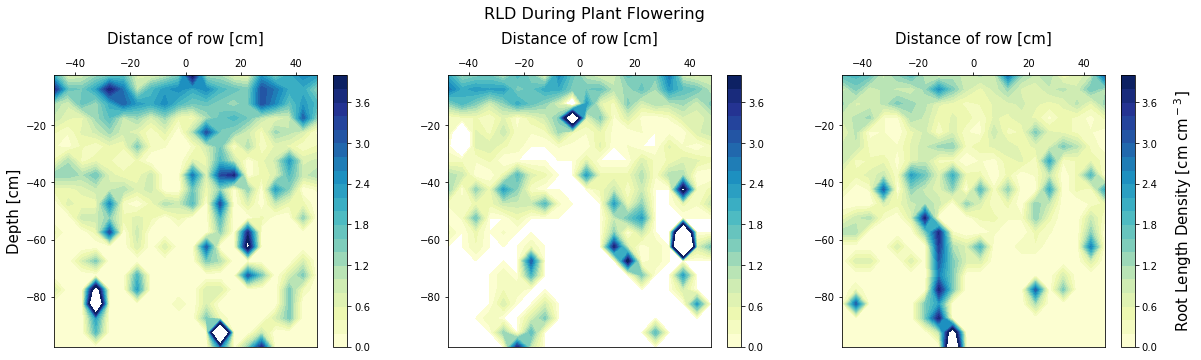

In [7]:
# Plot of RLD during flowering stage

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle("RLD During Plant Flowering", fontsize=16, y=1.07) 

fig21 = ax1.contourf(X21, Y21, flowering21, cmap='YlGnBu',levels=levels)
ax1.set_xlabel("Distance of row [cm]", fontsize=15, labelpad=15)
ax1.set_ylabel("Depth [cm]", fontsize=15)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
cbar = fig.colorbar(fig21, ax=ax1)

fig22 = ax2.contourf(X22, Y22, flowering22, cmap='YlGnBu',levels=levels)
ax2.set_xlabel("Distance of row [cm]",fontsize=15, labelpad=15)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
cbar = fig.colorbar(fig22, ax=ax2)

fig23 = ax3.contourf(X23, Y23, flowering23, cmap='YlGnBu',levels=levels)
ax3.set_xlabel("Distance of row [cm]",fontsize=15, labelpad=15)
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
cbar = fig.colorbar(fig23, ax=ax3)
cbar.ax.set_ylabel("Root Length Density [cm cm$^-$$^3$]",fontsize=15, labelpad=15)

plt.savefig('RLD during flowering ctrl.png')
plt.show()

In [8]:
# import "control-sim" data and save for optimization of root parameters

data_ctrl = pd.read_excel('RLD_2018.xlsx', sheet_name='control_sim', header=None)    
data_ctrl = data_ctrl.fillna(-1)

In [9]:
# Save data as pickle file

data_ctrl.to_pickle('RLD_ctrl.pkl')